In [1]:
!pip install imgaug

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [3]:
DATA_DIR = "./Data"
DATA_COLS = ["center","left","right","steering","throttle","reverse","speed"]

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'driving_log.csv'),names=DATA_COLS)

In [5]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Dat...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,0.0,0.0,0,0.000083
1,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Dat...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,0.0,0.0,0,0.000082
2,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Dat...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,0.0,0.0,0,0.000082
3,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Dat...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,0.0,0.0,0,0.000083
4,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Dat...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,D:\Sathvik\Education\Sem 6\TDL\Project\Car\Da...,0.0,0.0,0,0.000083


In [6]:
def only_img_name(path):
    _,img = ntpath.split(path)
    return img

In [7]:
df["center"] = df["center"].apply(only_img_name)
df["left"] = df["left"].apply(only_img_name)
df["right"] = df["right"].apply(only_img_name)

In [8]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2024_04_16_18_12_17_309.jpg,left_2024_04_16_18_12_17_309.jpg,right_2024_04_16_18_12_17_309.jpg,0.0,0.0,0,0.000083
1,center_2024_04_16_18_12_17_412.jpg,left_2024_04_16_18_12_17_412.jpg,right_2024_04_16_18_12_17_412.jpg,0.0,0.0,0,0.000082
2,center_2024_04_16_18_12_17_518.jpg,left_2024_04_16_18_12_17_518.jpg,right_2024_04_16_18_12_17_518.jpg,0.0,0.0,0,0.000082
3,center_2024_04_16_18_12_17_623.jpg,left_2024_04_16_18_12_17_623.jpg,right_2024_04_16_18_12_17_623.jpg,0.0,0.0,0,0.000083
4,center_2024_04_16_18_12_17_729.jpg,left_2024_04_16_18_12_17_729.jpg,right_2024_04_16_18_12_17_729.jpg,0.0,0.0,0,0.000083


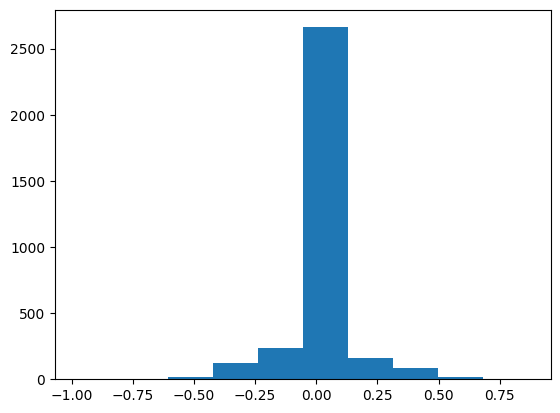

In [9]:
plt.hist(df["steering"])
plt.show()

In [10]:
df.shape

(3307, 7)

In [11]:
remove_list = []
hist, bins = np.histogram(df['steering'], 25)
for j in range(25):
  list_ = []
  for i in range(len(df['steering'])):
    if df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[400:]
  remove_list.extend(list_)
df.drop(df.index[remove_list], inplace=True)

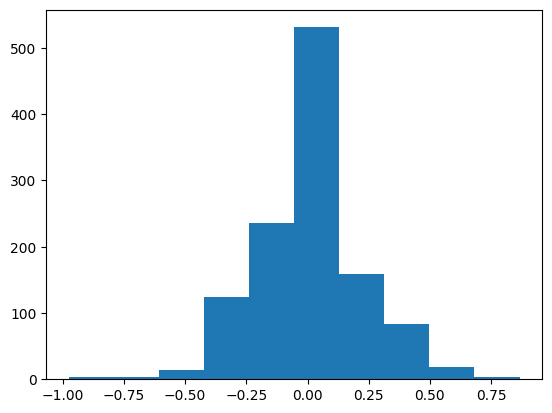

In [12]:
plt.hist(df["steering"])
plt.show()

In [13]:
df.shape

(1177, 7)

In [14]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [15]:
image_paths, steerings = load_img_steering(DATA_DIR + '/IMG', df)

In [16]:
image_paths

array(['./Data/IMG\\center_2024_04_16_18_12_18_868.jpg',
       './Data/IMG\\left_2024_04_16_18_12_18_868.jpg',
       './Data/IMG\\right_2024_04_16_18_12_18_868.jpg', ...,
       './Data/IMG\\center_2024_04_16_18_18_14_791.jpg',
       './Data/IMG\\left_2024_04_16_18_18_14_791.jpg',
       './Data/IMG\\right_2024_04_16_18_18_14_791.jpg'], dtype='<U45')

In [17]:
steerings

array([-0.1856886, -0.0356886, -0.3356886, ...,  0.       ,  0.15     ,
       -0.15     ])

In [21]:
len(image_paths)

3531

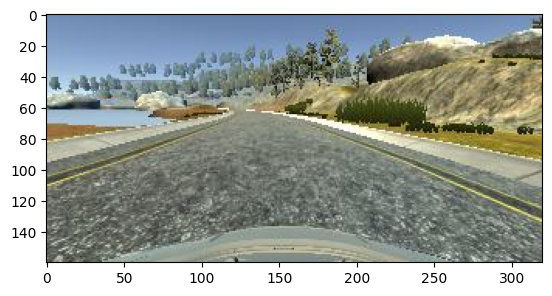

In [22]:
random_test_image_path = image_paths[0]
random_test_image = img.imread(random_test_image_path)
plt.imshow(random_test_image)

In [24]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

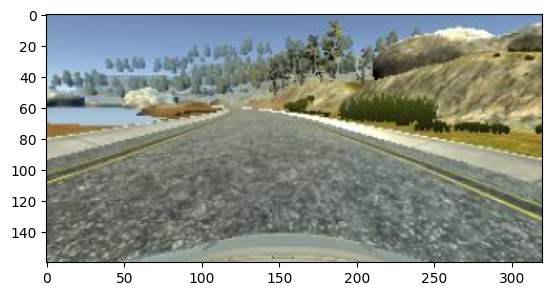

In [25]:
random_test_image_zoom = zoom(random_test_image)
plt.imshow(random_test_image_zoom)
plt.show()

In [27]:
def translation(image):
  translate = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = translate.augment_image(image)
  return image

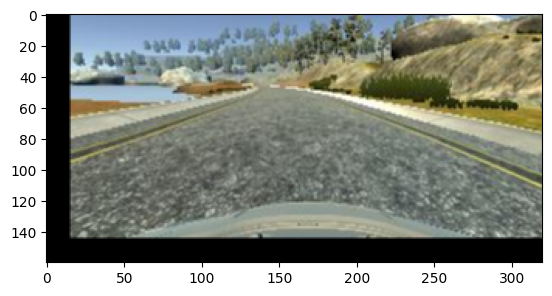

In [28]:
random_test_image_translation = translation(random_test_image)
plt.imshow(random_test_image_translation)
plt.show()

In [29]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.3, 1.5))
    image = brightness.augment_image(image)
    return image

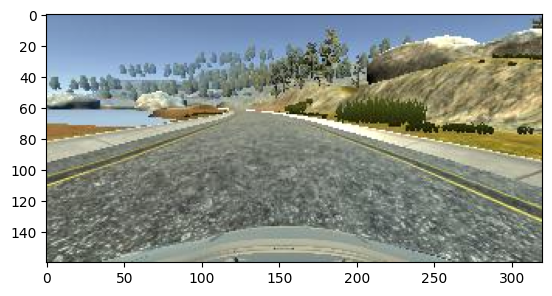

In [30]:
random_test_image_random_brightness = img_random_brightness(random_test_image)
plt.imshow(random_test_image_random_brightness)
plt.show()

In [31]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

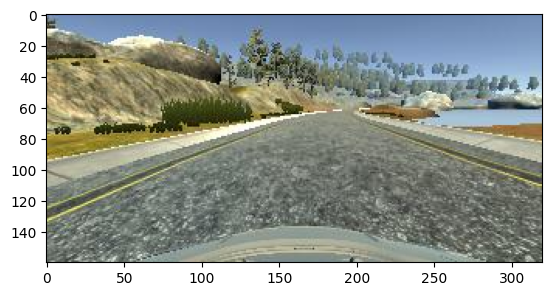

In [32]:
random_test_image_random_flip,rev_steering = img_random_flip(random_test_image,steerings[0])
plt.imshow(random_test_image_random_flip)
plt.show()

In [37]:
def random_transform(image, steering_angle):
    image = img.imread(image)
    if np.random.rand() < 0.5:
      image = translation(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

In [38]:
transformed_image,steering = random_transform(image_paths[2341],steerings[2341])

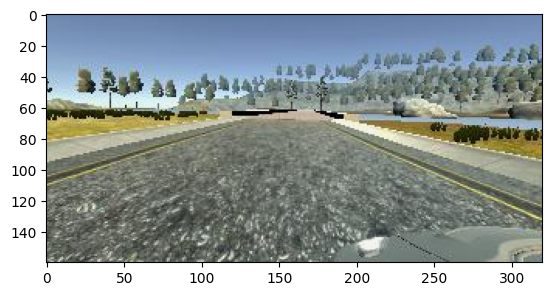

In [39]:
plt.imshow(transformed_image)
plt.show()

In [40]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

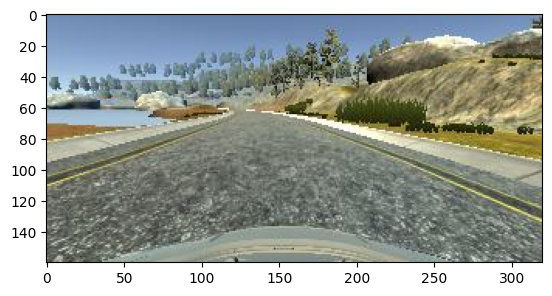

In [41]:
random_test_image_path = image_paths[0]
random_test_image = img.imread(random_test_image_path)
plt.imshow(random_test_image)
plt.show()

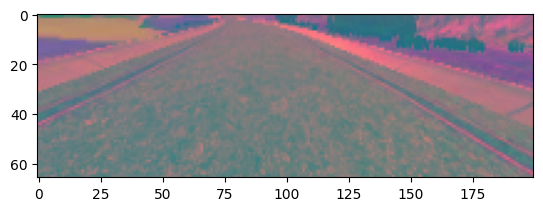

In [42]:
random_test_image_pre = img_preprocess(random_test_image)
plt.imshow(random_test_image_pre)
plt.show()

In [43]:
pre_images = []
steers = []

for i in range(len(image_paths)):
    org_img = img.imread(image_paths[i])
    pre_images.append(img_preprocess(org_img))
    steers.append(steerings[i])
    
    tr_img,steer = random_transform(image_paths[i],steerings[i])
    pre_images.append(img_preprocess(tr_img))
    steers.append(steer)

X = np.array(pre_images)
y = np.array(steers)
    
    

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [50]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (5, 5), activation='elu'))
  # model.add(Conv2D(64, (3,3), activation='elu'))
#   model.add(Dropout(0.5))


  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(1))

  model.compile(loss='mse', optimizer="adam")
  return model

model = nvidia_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 18, 64)         76864     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               115300    
                                                                 
 dense_5 (Dense)             (None, 50)               

In [51]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
166/166 [==============================] - 11s 63ms/step - loss: 0.1793 - val_loss: 0.0575
Epoch 2/10
166/166 [==============================] - 11s 64ms/step - loss: 2.3443 - val_loss: 0.0791
Epoch 3/10
166/166 [==============================] - 10s 60ms/step - loss: 0.0644 - val_loss: 0.0719
Epoch 4/10
166/166 [==============================] - 10s 63ms/step - loss: 0.0641 - val_loss: 0.0654
Epoch 5/10
166/166 [==============================] - 10s 63ms/step - loss: 0.0638 - val_loss: 0.0672
Epoch 6/10
166/166 [==============================] - 11s 64ms/step - loss: 0.0634 - val_loss: 0.0643
Epoch 7/10
166/166 [==============================] - 10s 61ms/step - loss: 0.0625 - val_loss: 0.0706
Epoch 8/10
166/166 [==============================] - 10s 61ms/step - loss: 0.0619 - val_loss: 0.0649
Epoch 9/10
166/166 [==============================] - 10s 60ms/step - loss: 0.0615 - val_loss: 0.0666
Epoch 10/10
166/166 [==============================] - 10s 61ms/step - loss: 0.061

Text(0.5, 0, 'Epoch')

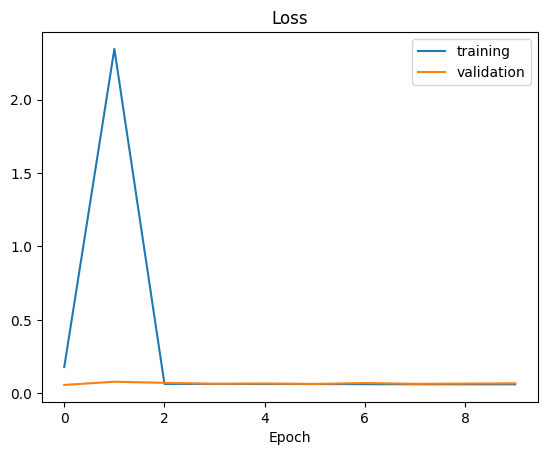

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [53]:
model.save('model.h5')